### Linear Regression Model - Simple

Regression is one of the foundational techniques in Machine Learning. Linear regression plays a vital role in solving real life problems.

**Data Set:** <br>
The data set focuses on the soccer players from the EPL and the objective of the notebook is to use the linear regression model to predict the scores of the players.

URL to the data set - `https://s3.amazonaws.com/projex.dezyre.com/fundamentals-simple-linear-regression-python-beginners/materials/EPL_Soccer_MLR_LR.csv`

We are starting off with the simple regression model - meaning which we will pick one predictor variable (by checking the correlation and picking one predictor variable with the highest correlation value) and one response variable

In [1]:
###Import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import seaborn as sns
from scipy import stats
import scipy
from matplotlib.pyplot import figure


In [2]:
###Loading the data

data_url = "https://s3.amazonaws.com/projex.dezyre.com/fundamentals-simple-linear-regression-python-beginners/materials/EPL_Soccer_MLR_LR.csv"

df_soccer = pd.read_csv(data_url)

In [3]:
df_soccer.head()

,PlayerName,Club,DistanceCovered(InKms),Goals,MinutestoGoalRatio,ShotsPerGame,AgentCharges,BMI,Cost,PreviousClubCost,Height,Weight,Score
0,"Braund, Mr. Owen Harris",MUN,3.96,7.5,37.5,12.3,60,20.56,109.1,63.32,195.9,78.9,19.75
1,"Allen, Mr. William Henry",MUN,4.41,8.3,38.2,12.7,68,20.67,102.8,58.55,189.7,74.4,21.30
2,"Moran, Mr. James",MUN,4.14,5.0,36.4,11.6,21,21.86,104.6,55.36,177.8,69.1,19.88
3,"McCarthy, Mr. Timothy J",MUN,4.11,5.3,37.3,12.6,69,21.88,126.4,57.18,185.0,74.9,23.66
4,"Palsson, Master. Gosta Leonard",MUN,4.45,6.8,41.5,14.0,29,18.96,80.3,53.20,184.6,64.6,17.64


In [4]:
df_soccer.columns

Index(['PlayerName', 'Club', 'DistanceCovered(InKms)', 'Goals',
       'MinutestoGoalRatio', 'ShotsPerGame', 'AgentCharges', 'BMI', 'Cost',
       'PreviousClubCost', 'Height', 'Weight', 'Score'],
      dtype='object')

### Exploratory Data Analysis

Exploratory Data Analysis (EDA) is a technique to analyze the data with visuals. It helps to understand the patterns, spot anomalies and check assumptions.

The main purpose is to have a look into the data before making any hypothesis about it

In [5]:
df_soccer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PlayerName              202 non-null    object 
 1   Club                    202 non-null    object 
 2   DistanceCovered(InKms)  202 non-null    float64
 3   Goals                   202 non-null    float64
 4   MinutestoGoalRatio      202 non-null    float64
 5   ShotsPerGame            202 non-null    float64
 6   AgentCharges            202 non-null    int64  
 7   BMI                     202 non-null    float64
 8   Cost                    202 non-null    float64
 9   PreviousClubCost        202 non-null    float64
 10  Height                  202 non-null    float64
 11  Weight                  202 non-null    float64
 12  Score                   202 non-null    float64
dtypes: float64(10), int64(1), object(2)
memory usage: 20.6+ KB


**Dataset Information** <br>
`dataframe.info()` gives information about the dataset including the list of columns with the count of non-null values and their data types.

**Soccer Dataset Key Points** <br>
 * 202 rows and 13 columns
 * No null values

In [6]:
df_soccer.describe()

,DistanceCovered(InKms),Goals,MinutestoGoalRatio,ShotsPerGame,AgentCharges,BMI,Cost,PreviousClubCost,Height,Weight,Score
count,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000
mean,4.718614,7.108663,43.091584,14.566337,76.876238,22.955891,69.021782,64.873713,180.103960,75.008168,13.507426
std,0.457976,1.800549,3.662989,1.362451,47.501239,2.863933,32.565333,13.070197,9.734494,13.925574,6.189826
min,3.800000,3.300000,35.900000,11.600000,8.000000,16.750000,28.000000,34.360000,148.900000,37.800000,5.630000
25%,4.372500,5.900000,40.600000,13.500000,41.250000,21.082500,43.850000,54.667500,174.000000,66.525000,8.545000
50%,4.755000,6.850000,43.500000,14.700000,65.500000,22.720000,58.600000,63.035000,179.700000,74.400000,11.650000
75%,5.030000,8.275000,45.575000,15.575000,97.000000,24.465000,90.350000,74.750000,186.175000,84.125000,18.080000
max,6.720000,14.300000,59.700000,19.200000,234.000000,34.420000,200.800000,106.000000,209.400000,123.200000,35.520000


**Describe Dataset**<br>
`dataframe.describe()` - With this information, the descriptive statistics of the numerical columns from the dataset.

The statistics ignores the NaN values.  

It helps to look at the spread and provides an excellent insight into the range of set of data

In [7]:
df_soccer.corr()

<ipython-input-7-128c5d7524f5>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_soccer.corr()


,DistanceCovered(InKms),Goals,MinutestoGoalRatio,ShotsPerGame,AgentCharges,BMI,Cost,PreviousClubCost,Height,Weight,Score
DistanceCovered(InKms),1.000000,0.147098,0.924964,0.888800,0.250865,0.299471,-0.403004,0.550975,0.358854,0.403743,-0.493512
Goals,0.147098,1.000000,0.153333,0.134721,0.131973,0.177032,0.137131,0.102734,0.076958,0.155844,0.108114
MinutestoGoalRatio,0.924964,0.153333,1.000000,0.950757,0.258240,0.320527,-0.449135,0.583375,0.371192,0.423699,-0.532449
ShotsPerGame,0.888800,0.134721,0.950757,1.000000,0.308391,0.382524,-0.435429,0.610986,0.352322,0.455255,-0.531522
AgentCharges,0.250865,0.131973,0.258240,0.308391,1.000000,0.302556,-0.108243,0.317581,0.123255,0.273686,-0.183386
BMI,0.299471,0.177032,0.320527,0.382524,0.302556,1.000000,0.321116,0.713858,0.337097,0.845955,0.187558
Cost,-0.403004,0.137131,-0.449135,-0.435429,-0.108243,0.321116,1.000000,-0.207749,-0.071253,0.154227,0.963017
PreviousClubCost,0.550975,0.102734,0.583375,0.610986,0.317581,0.713858,-0.207749,1.000000,0.802119,0.930904,-0.361850
Height,0.358854,0.076958,0.371192,0.352322,0.123255,0.337097,-0.071253,0.802119,1.000000,0.780906,-0.188022
Weight,0.403743,0.155844,0.423699,0.455255,0.273686,0.845955,0.154227,0.930904,0.780906,1.000000,-0.000162


**Correlation** <br>
It is used to measure the strength of relationship between two different variables.

It indicates that the value of one variable changes the value of other variable in a specific direction with some magnitude

* Correlation = 1 implies stronger positive relationship between the variable
* Correlation = 0 implies no relationship between the variables
* Correlation = -1 implies stronger negative relationship between the variables

Looking at the above table for correlation scores, it appears that the Score and Cost are highly related.

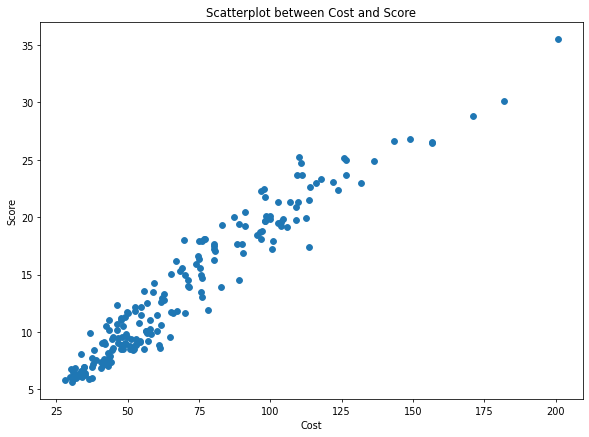

In [8]:
### Scatter plot between Cost & Score
figure(figsize=(10, 7), dpi=70)
plt.scatter(df_soccer["Cost"], df_soccer["Score"])

### Defining labels
plt.xlabel("Cost")
plt.ylabel("Score")

plt.title("Scatterplot between Cost and Score")

plt.show()

After examining the correlation coefficients, Cost and Score was chosen to be used in the linear regression model with Cost as the predictor variable and Score as the response variable

In [9]:
### Selecting the X & y values and then splitting the test data into training & testing

X = df_soccer["Cost"]
y = df_soccer["Score"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25)

In [10]:
len(X_train), len(X_test)

(151, 51)

For the first linear regression model, Statsmodels' OLS is considered

In [11]:
### Statsmodels - fit the model
lr = sm.OLS(y_train, X_train).fit()

### Getting the summary and parameters
lr.params
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Score   R-squared (uncentered):                   0.987
Model:                            OLS   Adj. R-squared (uncentered):              0.986
Method:                 Least Squares   F-statistic:                          1.099e+04
Date:                Mon, 25 Mar 2024   Prob (F-statistic):                   3.29e-142
Time:                        00:53:02   Log-Likelihood:                         -299.33
No. Observations:                 151   AIC:                                      600.7
Df Residuals:                     150   BIC:                                      603.7
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Cost           0.1922      0.002    104.817      0.000       0.189       0.196
==============================================================================
Omnibus:                        0.567   Durbin-Watson:                   1.864
Prob(Omnibus):                  0.753   Jarque-Bera (JB):                0.245
Skew:                           0.010   Prob(JB):                        0.885
Kurtosis:                       3.196   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In the above cell, the intercept term is not enforced.

In [12]:
### Forcing intercept term
X_with_intercept = sm.add_constant(X_train)
lr = sm.OLS(y_train, X_with_intercept).fit()

print(lr.summary())

print(lr.params)

                            OLS Regression Results                            
Dep. Variable:                  Score   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     1908.
Date:                Mon, 25 Mar 2024   Prob (F-statistic):           8.00e-87
Time:                        00:53:03   Log-Likelihood:                -295.65
No. Observations:                 151   AIC:                             595.3
Df Residuals:                     149   BIC:                             601.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8887      0.326      2.727      0.0

**Comparing the training data with the data when the intercept is introduced**

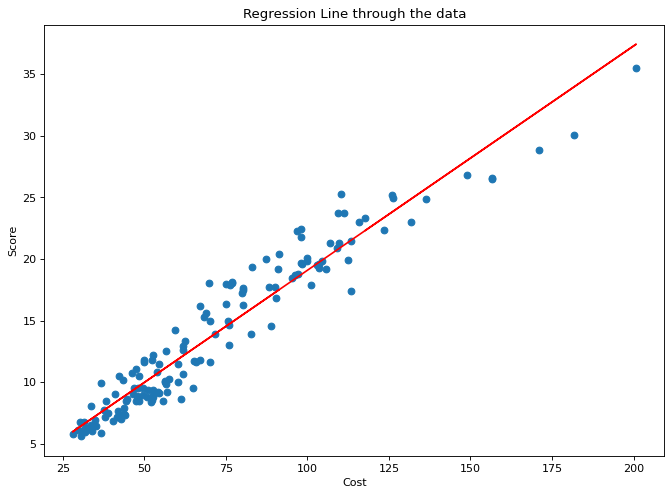

In [13]:
b0 = lr.params[0]
b1 = lr.params[1]

### Scatterplot between the X_train and X_train when the intercept is introduced
figure(figsize=(10, 7), dpi=80)

plt.scatter(X_train, y_train)
plt.plot(X_train, b0+b1*X_train, 'r')

plt.xlabel("Cost")
plt.ylabel("Score")

plt.title("Regression Line through the data")

plt.show()


### Prediction on Test Data

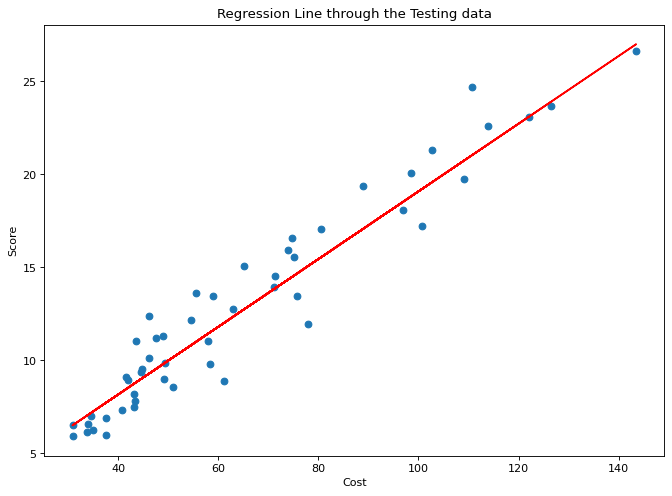

In [14]:
### Introducing the intercept on test data

X_test_intercept = sm.add_constant(X_test)
y_pred = lr.predict(X_test_intercept)

### Scatter plot on test data and drawing the regression line

figure(figsize=(10, 7), dpi=80)

plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, 'r')

plt.xlabel("Cost")
plt.ylabel("Score")

plt.title("Regression Line through the Testing data")

plt.show()



### Diagnostics & Remedies

The section helps with evaluating the data and check if the data follows the assumptions of linear regression

**Assumptions of Linear Regression**:

* Relationship between independent & dependent variable is linear
* Homoscedasticity - meaning the homegeneity of variance of residuals across the values of the independent variable
* Independence of observations
* Normality


*Following are the things we usually perform in the data to diagnose if Linear Regression may not be the right fit*

* Non-linearity
* Heteroscedasticity
* Independence
* Outliers
* Missing features


#### Residual Analysis

It is used to study residuals in data and understand what needs to be done to improve the performance of the model. Residual is defined by the difference between the predicted value and the true value (ground truth)

Plotting the residuals against the predictor can help to show the following things:

* departure from linearity -> reevaluate the model if this happens or try a modification to make the data linear
* indications of non-constant variance -> if the scatter is in the shape of a megaphone, we can claim the variance is not constant

**Other Plots:**

* Sequence Plot
* Box-Plot


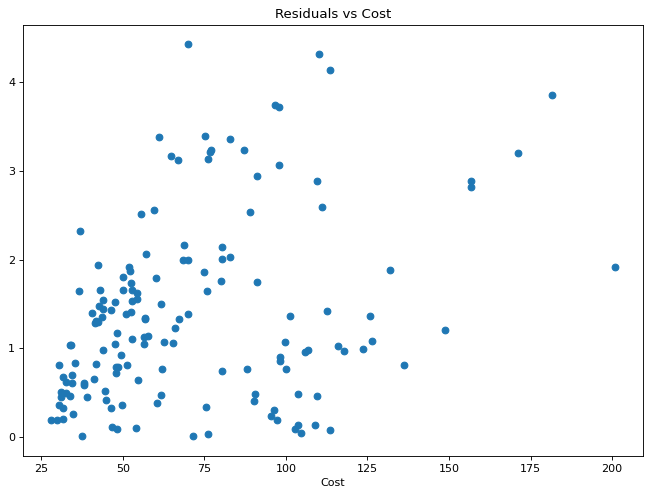

<ipython-input-15-8d2b10ea7fea>:20: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(r_training, bins = 15)


<Figure size 640x480 with 0 Axes>

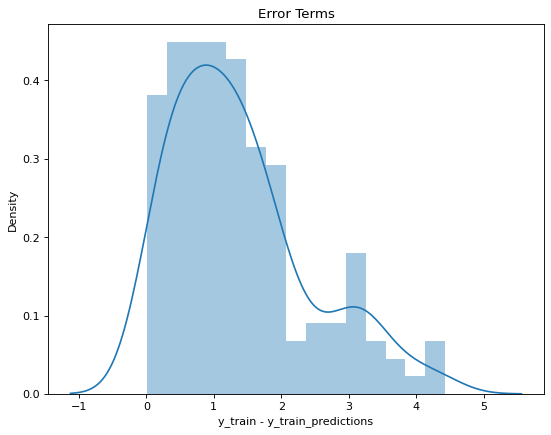

((array([-2.60603471, -2.28639722, -2.10324767, -1.97158309, -1.867224  ,
         -1.7799545 , -1.70445293, -1.63757876, -1.57731662, -1.52229259,
         -1.47152616, -1.42429196, -1.3800376 , -1.33833223, -1.29883298,
         -1.26126233, -1.22539231, -1.19103324, -1.1580255 , -1.12623343,
         -1.09554071, -1.06584677, -1.03706405, -1.0091158 , -0.98193434,
         -0.95545967, -0.92963831, -0.90442237, -0.87976879, -0.85563868,
         -0.83199678, -0.80881102, -0.78605212, -0.76369328, -0.74170987,
         -0.7200792 , -0.69878032, -0.67779383, -0.65710172, -0.6366872 ,
         -0.61653466, -0.59662946, -0.57695791, -0.55750713, -0.53826504,
         -0.51922023, -0.50036191, -0.48167989, -0.4631645 , -0.44480656,
         -0.42659733, -0.40852846, -0.39059201, -0.37278035, -0.35508619,
         -0.33750252, -0.32002258, -0.3026399 , -0.28534819, -0.26814138,
         -0.25101361, -0.23395916, -0.2169725 , -0.20004822, -0.18318105,
         -0.16636584, -0.14959754, -0.

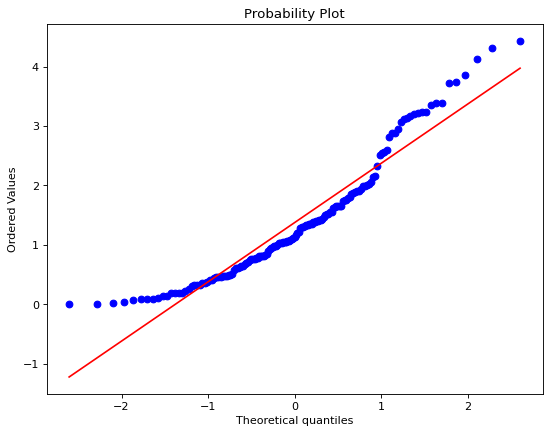

In [15]:
y_train_predictions = lr.predict(X_with_intercept)

### Finding residuals on training data
r_training = (y_train - y_train_predictions)
r_training = np.abs(r_training)

### Plotting the absolute residuals vs predictor on training data
figure(figsize=(10,7), dpi=80)
plt.title("Residuals vs Cost")
plt.xlabel("Cost")
plt.scatter(X_train, r_training)

plt.show()



###Plotting the histogram using the residual values
fig = plt.figure()
figure(figsize=(8,6), dpi = 80)
sns.distplot(r_training, bins = 15)
plt.title("Error Terms")
plt.xlabel("y_train - y_train_predictions")
plt.show()


### Normality Plot
figure(figsize=(8, 6), dpi=80)
scipy.stats.probplot(r_training, plot=plt)

**Transformations to avoid non-constant variance:**

Non-constant variance can be a problem in linear regression, as the assumption of constant variance of the errors is a key requirement for the ordinary least squares (OLS) method to be unbiased and efficient. When this assumption is violated, the regression coefficients can be inefficient and/or the predictions can be biased. To avoid non-constant variance, there are different data transformations that can be applied.

